In [1]:
import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.db as db
import rubin_sim.maf.utils as utils
import rubin_sim.maf.metrics as metrics
import sqlite3
import numpy as np
import healpy as hp
%matplotlib inline
import glob
import matplotlib.pylab as plt

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/runComparison/runComparison.py:22: UserWarning: 
The generateDiffHtml method requires bokeh to be installed
but it is not needed to use the other methods in this class.
Run: pip install bokeh then restart your jupyter notebook kernel.
  warnings.warn('\n'+'The generateDiffHtml method requires bokeh to be installed'+'\n'+
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/mafContrib/LSSObsStrategy/artificialStructureCalculation.py:40: UserWarning: sympy not installed
  warnings.warn('sympy not installed')
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/mafContrib/transientAsciiSEDMetric.py:19: UserWarning: sncosmo not installed
  warnings.warn('sncosmo not installed')


In [2]:
dbfiles = glob.glob('*10yrs.db')
dbfiles.sort()

In [3]:
dbfiles

['baseline_nexp2_v1.7.1_10yrs.db']

In [4]:
class GapValsMetric(metrics.BaseMetric):
    def __init__(self, mjdCol='observationStartMJD', metricName='gapvals', max_gap=3, **kwargs):
        self.mjdCol = mjdCol
        self.max_gap = max_gap
        super(GapValsMetric, self).__init__(
            col=[mjdCol], metricDtype='object', metricName=metricName,  **kwargs)
    def run(self, dataSlice, slicePoint):
        
        gaps = dataSlice[self.mjdCol] - dataSlice[self.mjdCol][:,np.newaxis]
        indx = np.triu_indices(dataSlice.size, k=1)
        result = np.ravel(np.abs(gaps[indx]))
        indx = np.where(result < self.max_gap)[0]
        return result[indx]

In [5]:
nside=8
sql = ''
filename = dbfiles[0]
opsimdb = db.OpsimDatabase(dbfiles[0])
runname = filename.replace('_10yrs.db', '')
bundleList = []
slicer = slicers.HealpixSlicer(nside=nside)
resultsDb = db.ResultsDb(outDir=runname)
summaryStats = []
metric = GapValsMetric()

bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=runname, summaryMetrics=summaryStats))
outDir = runname
resultsDb = db.ResultsDb(outDir=outDir)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)


Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'observationStartMJD', 'fieldRA'].
Found 2044984 visits
Running:  ['baseline_nexp2_v1_7_1_gapvals_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
Plotting complete.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


In [6]:
gaps = bundleList[0].metricValues
gaps =  np.concatenate(gaps.data[np.where(gaps.mask == False)])

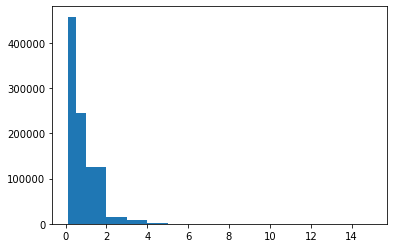

In [10]:
_ack = plt.hist(gaps*24, bins=[0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15])